# 项目：加密货币数据分析

运用所学的知识，对3个交易对市场行情进行分析。
* BTC/USDT
* ETH/USDT
* BCH/USDT

___
## Step 0: 引入相关模块/包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

___
## Step 1: 获取加密货币市场行情

In [2]:
import datetime
import cryptocoin_data_utils as cdu

In [3]:
btc_df = cdu.get_single_kline_data(symbol='btc_usdt', kline_type='1day')
eth_df = cdu.get_single_kline_data(symbol='eth_usdt', kline_type='1day')
bch_df = cdu.get_single_kline_data(symbol='bch_usdt', kline_type='1day')

In [4]:
btc_df.head()

datetime     open     high      low    close         vol  \
0 2017-10-10 16:00:00        1     4901        1     4901       19.26   
1 2017-10-11 16:00:00     4901     4999     4790     4989    0.580096   
2 2017-10-12 16:00:00     4989     5922     4989   5741.7  20.7398427   
3 2017-10-13 16:00:00   5741.7  5849.95  5473.77  5849.95    19.25958   
4 2017-10-14 16:00:00  5849.95  5849.95  5686.41     5848  8.65860682   

     symbol  
0  BTC/USDT  
1  BTC/USDT  
2  BTC/USDT  
3  BTC/USDT  
4  BTC/USDT

In [5]:
eth_df.head()

datetime   open    high    low  close          vol    symbol
0 2017-10-10 16:00:00      1     310      1    300      260.826  ETH/USDT
1 2017-10-11 16:00:00    300     300    285    285   0.33326666  ETH/USDT
2 2017-10-12 16:00:00    285   304.8    285  304.8   2.39326666  ETH/USDT
3 2017-10-13 16:00:00  304.8  343.99  304.8  343.8        8.284  ETH/USDT
4 2017-10-14 16:00:00  343.8     348    331    331  25.58901316  ETH/USDT

In [6]:
bch_df.head()

datetime    open   high     low   close           vol    symbol
0 2017-10-31 16:00:00  453.62    550  453.62  499.98     3.4223854  BCH/USDT
1 2017-11-01 16:00:00  499.98    568   470.2  526.05  479.29564084  BCH/USDT
2 2017-11-02 16:00:00  526.05    679  526.05     679  1959.6130932  BCH/USDT
3 2017-11-03 16:00:00     679  679.9  570.06  624.98        1936.2  BCH/USDT
4 2017-11-04 16:00:00  624.98  627.9     570  575.81      1045.656  BCH/USDT

In [7]:
btc_df.to_csv('./btc_usdt_data.csv', index=False)
eth_df.to_csv('./eth_usdt_data.csv', index=False)
bch_df.to_csv('./bch_usdt_data.csv', index=False)

___
## Step 2: 可视化数据

### 2.1 收盘价可视化

In [8]:
btc_df = pd.read_csv('./btc_usdt_data.csv', index_col='datetime', parse_dates=True)
eth_df = pd.read_csv('./eth_usdt_data.csv', index_col='datetime', parse_dates=True)
bch_df = pd.read_csv('./bch_usdt_data.csv', index_col='datetime', parse_dates=True)

In [9]:
# 检查是否有重复的index
btc_df[btc_df.index.duplicated()]

open       high     low      close           vol  \
datetime                                                                     
2018-02-03 16:00:00  9188.9281  9470.6318  8450.0  8837.6286  46148.596221   

                       symbol  
datetime                       
2018-02-03 16:00:00  BTC/USDT

In [10]:
btc_df.loc['2018-02-03']

open       high     low      close           vol  \
datetime                                                                     
2018-02-03 16:00:00  9188.9281  9470.6318  8450.0  8837.6286  46148.596221   
2018-02-03 16:00:00  9188.9281  9470.6318  8450.0  8837.6286  46148.596221   

                       symbol  
datetime                       
2018-02-03 16:00:00  BTC/USDT  
2018-02-03 16:00:00  BTC/USDT

In [11]:
if btc_df.index.duplicated().any():
    print('BTC索引去重')
    btc_df = btc_df[~btc_df.index.duplicated()]

if eth_df.index.duplicated().any():
    print('ETH索引去重')
    eth_df = eth_df.loc[~eth_df.index.duplicated()]
    
if bch_df.index.duplicated().any():
    print('BCH索引去重')
    bch_df = bch_df.loc[~bch_df.index.duplicated()]

BTC索引去重
ETH索引去重
BCH索引去重


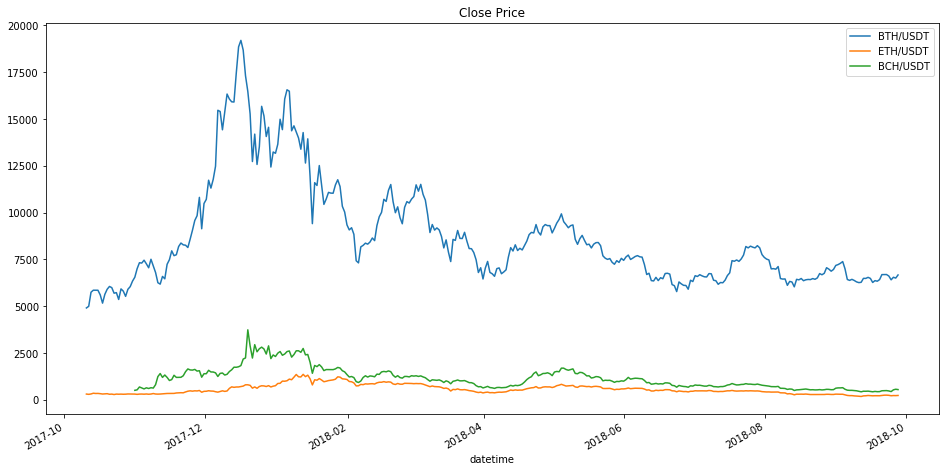

In [12]:
btc_df['close'].plot(label='BTH/USDT', figsize=(16,8), title='Close Price')
eth_df['close'].plot(label='ETH/USDT')
bch_df['close'].plot(label='BCH/USDT')
plt.legend()

### 2.2 日成交量可视化

In [13]:
btc_df['vol'].plot(label='BTC/USDT', figsize=(16, 8), title='Volume Traded')
eth_df['vol'].plot(label='ETH/USDT')
bch_df['vol'].plot(label='BCH/USDT')
plt.legend()

In [14]:
eth_df['vol'].idxmax()

Timestamp('2018-02-05 16:00:00')

Q: 2018年2月5日，2018年9月5日，2018年9月13日这三天以太坊发生了什么？

A: 2018年2月5日，Truebit将Dogecoin带入以太坊区块链。http://www.o-o-o.link/article/6034.html

___
## Step 3: 金融数据分析

### 3.1 价格相关性分析

In [15]:
from pandas.plotting import scatter_matrix

In [16]:
coins_index = bch_df.index
coins_df = pd.DataFrame(columns=['BTC/USDT', 'ETH/USDT', 'BCH/USDT'], index=bch_df.index)
coins_df.head()

BTC/USDT ETH/USDT BCH/USDT
datetime                                      
2017-10-31 16:00:00      NaN      NaN      NaN
2017-11-01 16:00:00      NaN      NaN      NaN
2017-11-02 16:00:00      NaN      NaN      NaN
2017-11-03 16:00:00      NaN      NaN      NaN
2017-11-04 16:00:00      NaN      NaN      NaN

In [17]:
coins_df['BTC/USDT'] = btc_df['close']
coins_df['ETH/USDT'] = eth_df['close']
coins_df['BCH/USDT'] = bch_df['close']

In [18]:
coins_df.head()

BTC/USDT  ETH/USDT  BCH/USDT
datetime                                         
2017-10-31 16:00:00   6544.12    298.41    499.98
2017-11-01 16:00:00   7000.00    284.54    526.05
2017-11-02 16:00:00   7318.58    298.08    679.00
2017-11-03 16:00:00   7299.00    300.91    624.98
2017-11-04 16:00:00   7453.39    293.18    575.81

* 使用[scatter_matrix()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html)可视化相关性

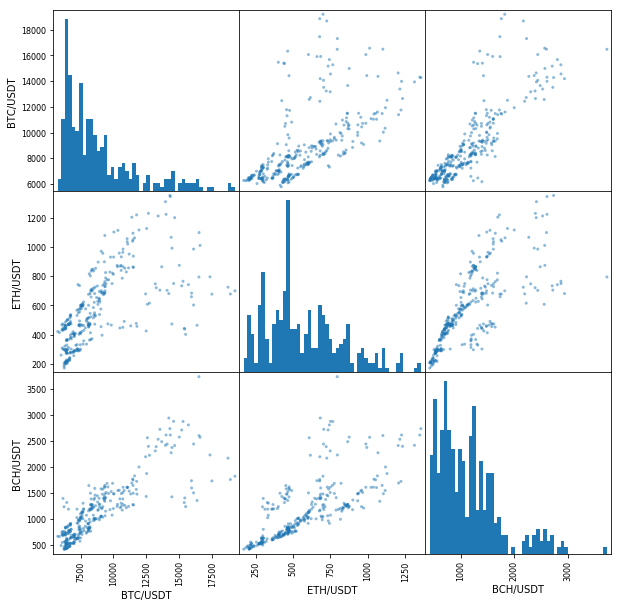

In [19]:
scatter_matrix(coins_df, figsize=(10, 10), hist_kwds={'bins': 50});

* 使用[pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html)可视化相关性

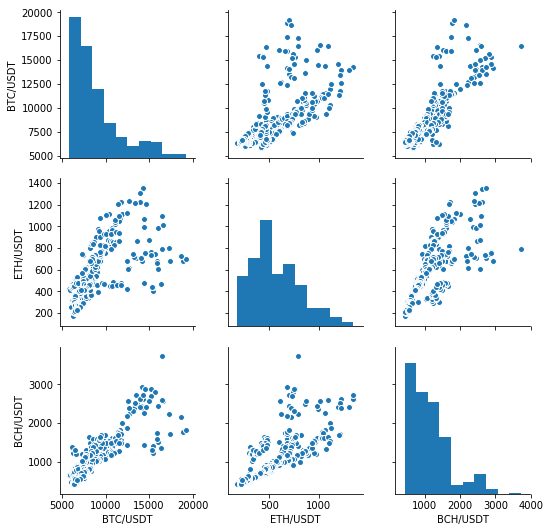

In [20]:
import seaborn as sns

sns.pairplot(coins_df)

* 使用[corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)量化相关性

In [21]:
coins_df.corr()

BTC/USDT  ETH/USDT  BCH/USDT
BTC/USDT  1.000000  0.639730  0.849349
ETH/USDT  0.639730  1.000000  0.740272
BCH/USDT  0.849349  0.740272  1.000000

### 3.2 日收益率分析

日收益率计算公式：

$ r_t = \frac{p_t}{p_{t-1}} -1$

* $p_t$: $t$ 时刻的价格
* $p_{t-1}$: $t-1$ 时刻的价格

* 方法1：用[shift()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html)操作

In [22]:
btc_df['returns'] = (btc_df['close'] / btc_df['close'].shift(1) ) - 1

In [23]:
btc_df.head()

open     high      low    close        vol    symbol  \
datetime                                                                       
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT   

                      returns  
datetime                       
2017-10-10 16:00:00       NaN  
2017-10-11 16:00:00  0.017956  
2017-10-12 16:00:00  0.150872  
2017-10-13 16:00:00  0.018853  
2017-10-14 16:00:00 -0.000333

* 方法2：使用[pct_change()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html)操作

In [24]:
btc_df['returns'] = btc_df['close'].pct_change(1)

In [25]:
btc_df.head()

open     high      low    close        vol    symbol  \
datetime                                                                       
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT   

                      returns  
datetime                       
2017-10-10 16:00:00       NaN  
2017-10-11 16:00:00  0.017956  
2017-10-12 16:00:00  0.150872  
2017-10-13 16:00:00  0.018853  
2017-10-14 16:00:00 -0.000333

In [26]:
eth_df['returns'] = eth_df['close'].pct_change(1)
bch_df['returns'] = bch_df['close'].pct_change(1)

In [27]:
eth_df.head()

open    high    low  close         vol    symbol  \
datetime                                                                 
2017-10-10 16:00:00    1.0  310.00    1.0  300.0  260.826000  ETH/USDT   
2017-10-11 16:00:00  300.0  300.00  285.0  285.0    0.333267  ETH/USDT   
2017-10-12 16:00:00  285.0  304.80  285.0  304.8    2.393267  ETH/USDT   
2017-10-13 16:00:00  304.8  343.99  304.8  343.8    8.284000  ETH/USDT   
2017-10-14 16:00:00  343.8  348.00  331.0  331.0   25.589013  ETH/USDT   

                      returns  
datetime                       
2017-10-10 16:00:00       NaN  
2017-10-11 16:00:00 -0.050000  
2017-10-12 16:00:00  0.069474  
2017-10-13 16:00:00  0.127953  
2017-10-14 16:00:00 -0.037231

In [28]:
bch_df.head()

open   high     low   close          vol    symbol  \
datetime                                                                    
2017-10-31 16:00:00  453.62  550.0  453.62  499.98     3.422385  BCH/USDT   
2017-11-01 16:00:00  499.98  568.0  470.20  526.05   479.295641  BCH/USDT   
2017-11-02 16:00:00  526.05  679.0  526.05  679.00  1959.613093  BCH/USDT   
2017-11-03 16:00:00  679.00  679.9  570.06  624.98  1936.200000  BCH/USDT   
2017-11-04 16:00:00  624.98  627.9  570.00  575.81  1045.656000  BCH/USDT   

                      returns  
datetime                       
2017-10-31 16:00:00       NaN  
2017-11-01 16:00:00  0.052142  
2017-11-02 16:00:00  0.290752  
2017-11-03 16:00:00 -0.079558  
2017-11-04 16:00:00 -0.078675

* 使用直方图查看日收益率的稳定性

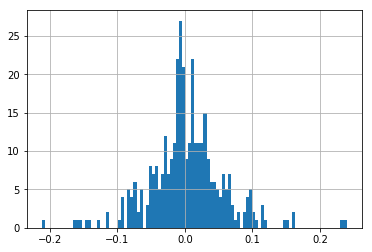

In [29]:
btc_df['returns'].hist(bins=100)

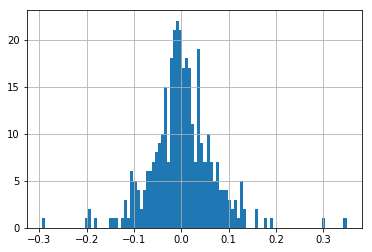

In [30]:
eth_df['returns'].hist(bins=100)

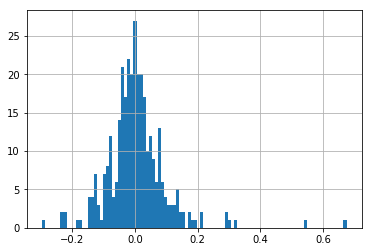

In [31]:
bch_df['returns'].hist(bins=100)

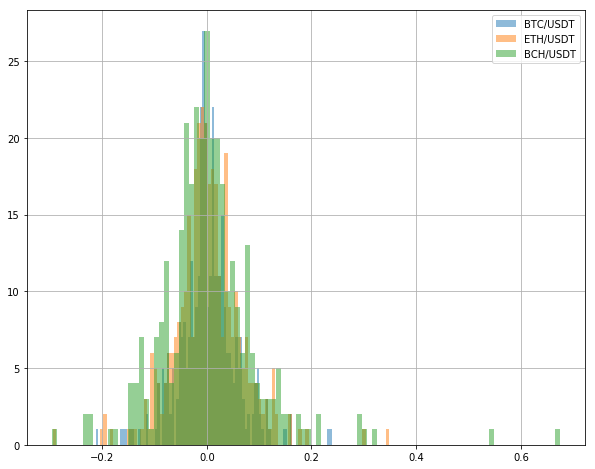

In [32]:
btc_df['returns'].hist(bins=100, label='BTC/USDT', figsize=(10, 8), alpha=0.5)
eth_df['returns'].hist(bins=100, label='ETH/USDT', alpha=0.5)
bch_df['returns'].hist(bins=100, label='BCH/USDT', alpha=0.5)
plt.legend()

* 使用盒子图比较不同加密货币的日收益率

In [33]:
returns_df = pd.concat([btc_df['returns'], eth_df['returns'], bch_df['returns']], axis=1)
returns_df.columns = ['BTC Returns', 'ETH Returns', 'BCH Returns']

In [34]:
returns_df.head()

BTC Returns  ETH Returns  BCH Returns
datetime                                                  
2017-10-10 16:00:00          NaN          NaN          NaN
2017-10-11 16:00:00     0.017956    -0.050000          NaN
2017-10-12 16:00:00     0.150872     0.069474          NaN
2017-10-13 16:00:00     0.018853     0.127953          NaN
2017-10-14 16:00:00    -0.000333    -0.037231          NaN

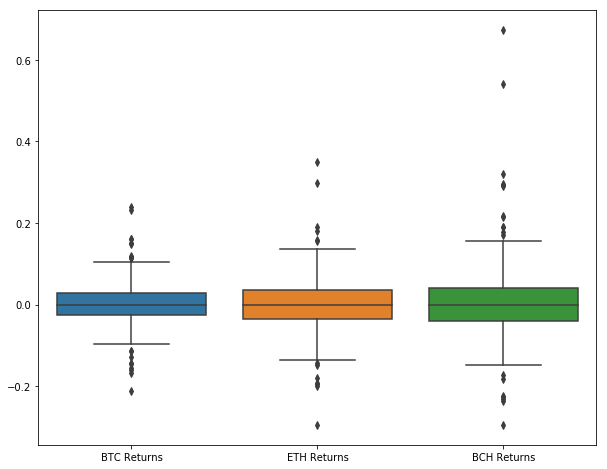

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=returns_df)

____
### 3.3 累计日收益率

以下是某个加密货币的价格：

    日期                        价格
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**日收益** : $\frac{p_t}{p_{t-1}}$，表示和前一天相比的获利/损失。大于1，表示获利；小于1，表示损失。

**日收益率** : $\frac{p_t}{p_{t-1}} - 1$，表示和前一天相比的获利/损失的百分比。大于0，表示获利；小于0，表示损失。

    日期                         日收益                        日收益率%
    01/01/2018                 10/10 =  1                           -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**累计收益**: 

    日期                           累计收益                      累计收益率%
    01/01/2018                  10/10 =  1                         -  
    01/02/2018                  15/10 =  3/2                       50 %
    01/03/2018                  20/10 =  2                         100 %
    01/04/2018                  25/10 =  5/2                       150 %

**累计日收益** : $\frac{p_t}{p_1}$，表示和第一天相比的获利/损失。大于1，表示获利；小于1，表示损失。

**累计日收益率** : $\frac{p_t}{p_1} - 1$，表示和第一天相比的获利/损失的百分比。大于0，表示获利；小于0，表示损失。

In [36]:
btc_df.head()

open     high      low    close        vol    symbol  \
datetime                                                                       
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT   

                      returns  
datetime                       
2017-10-10 16:00:00       NaN  
2017-10-11 16:00:00  0.017956  
2017-10-12 16:00:00  0.150872  
2017-10-13 16:00:00  0.018853  
2017-10-14 16:00:00 -0.000333

In [38]:
btc_df['Cumulative Returns'] = btc_df['close'] / btc_df.iloc[0]['close'] - 1

In [39]:
btc_df.head()

open     high      low    close        vol    symbol  \
datetime                                                                       
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT   

                      returns  Cumulative Returns  
datetime                                           
2017-10-10 16:00:00       NaN            0.000000  
2017-10-11 16:00:00  0.017956            0.017956  
2017-10-12 16:00:00  0.150872            0.171536  
2017-10-13 16:00:00  0.018853            0.193624  
2017-10-14 16:00:00 -0.000333            0.193226

In [40]:
eth_df['Cumulative Returns'] = eth_df['close'] / eth_df.iloc[0]['close'] - 1
bch_df['Cumulative Returns'] = bch_df['close'] / bch_df.iloc[0]['close'] - 1

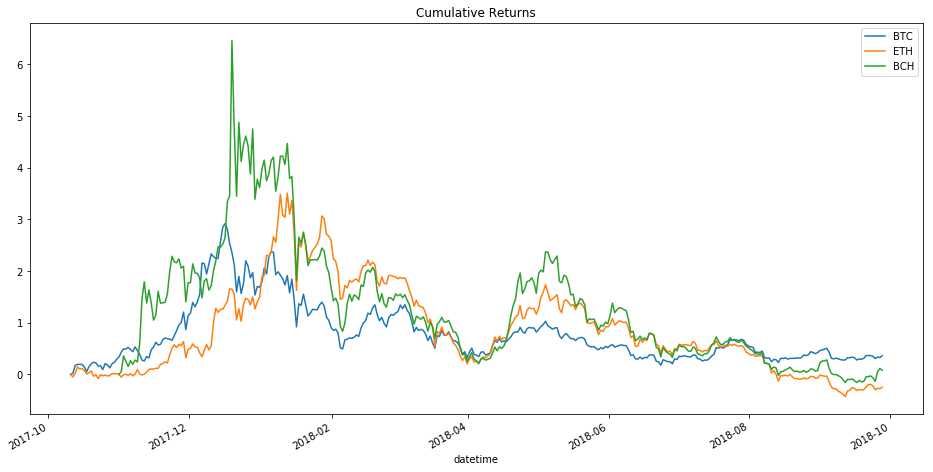

In [41]:
btc_df['Cumulative Returns'].plot(label='BTC', figsize=(16, 8), title='Cumulative Returns')
eth_df['Cumulative Returns'].plot(label='ETH')
bch_df['Cumulative Returns'].plot(label='BCH')
plt.legend()